In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('dataset_italianoEinglese_martina.csv')

In [3]:
df.head(3)

,Unnamed: 0.1,Unnamed: 0,date,id,tweetText,user,likeCount,lang,replies,mentions,outlinks
0,0,0,17-05-2023,1658980398242713603,@SibillaDavid Infatti ChatGPT ogni tanto si la...,katiadiluna16,1,it,1,"[User(username='SibillaDavid', id=159558223479...",[]
1,1,1,17-05-2023,1658978881783701504,@katiadiluna16 Sono peggio di ChatGPT,SibillaDavid,1,it,1,"[User(username='katiadiluna16', id=3669961223,...",[]
2,2,2,17-05-2023,1658976280086233089,@northern_mr Oggi basta chiederlo a Chatgpt e ...,katiadiluna16,1,it,1,"[User(username='northern_mr', id=1485114886808...",[]


In [4]:
df.tail(3)

,Unnamed: 0.1,Unnamed: 0,date,id,tweetText,user,likeCount,lang,replies,mentions,outlinks
27001,27001,9998,29-05-2023,1663049602851807232,@ivy_wylder @ask_aubry I’ve been looking for s...,dan_dd,6,en,0,"[User(username='ivy_wylder', id=12147283985404...",[]
27002,27002,9999,29-05-2023,1663049444613410816,Is someone gonna remake Facade with ChatGPT?,PwnySlaystation,1,en,0,NaN,[]
27003,27003,10000,29-05-2023,1663049350560514050,@shotgun2thehead chatgpt is really good people...,teengoatmance,1,en,1,"[User(username='shotgun2thehead', id=257651288...",[]


In [5]:
df.shape

(27004, 11)

In [6]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'date', 'id', 'tweetText', 'user',
       'likeCount', 'lang', 'replies', 'mentions', 'outlinks'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Unnamed: 0.1        0
Unnamed: 0          0
date                0
id                  0
tweetText           0
user                0
likeCount           0
lang                0
replies             0
mentions        15211
outlinks            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27004 entries, 0 to 27003
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  27004 non-null  int64 
 1   Unnamed: 0    27004 non-null  int64 
 2   date          27004 non-null  object
 3   id            27004 non-null  int64 
 4   tweetText     27004 non-null  object
 5   user          27004 non-null  object
 6   likeCount     27004 non-null  int64 
 7   lang          27004 non-null  object
 8   replies       27004 non-null  int64 
 9   mentions      11793 non-null  object
 10  outlinks      27004 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.3+ MB


In [10]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace= True)
df.head(3)

,date,id,tweetText,user,likeCount,lang,replies,mentions,outlinks
0,17-05-2023,1658980398242713603,@SibillaDavid Infatti ChatGPT ogni tanto si la...,katiadiluna16,1,it,1,"[User(username='SibillaDavid', id=159558223479...",[]
1,17-05-2023,1658978881783701504,@katiadiluna16 Sono peggio di ChatGPT,SibillaDavid,1,it,1,"[User(username='katiadiluna16', id=3669961223,...",[]
2,17-05-2023,1658976280086233089,@northern_mr Oggi basta chiederlo a Chatgpt e ...,katiadiluna16,1,it,1,"[User(username='northern_mr', id=1485114886808...",[]


In [11]:
df.describe() # controllo i valori relativi al numero di Like --> andamento esponenziale e Replies

,id,likeCount,replies
count,2.700400e+04,27004.000000,27004.000000
mean,1.654816e+18,12.338987,1.517516
std,8.176154e+15,387.031448,34.860720
min,1.640752e+18,0.000000,0.000000
25%,1.652271e+18,0.000000,0.000000
50%,1.652415e+18,1.000000,0.000000
75%,1.663166e+18,2.000000,1.000000
max,1.663334e+18,48534.000000,3712.000000


In [12]:
df.nunique()

date            17
id           26979
tweetText    26741
user         20701
likeCount      306
lang             2
replies        101
mentions      8431
outlinks      6779
dtype: int64

In [13]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [14]:
most_frequent_values(df) #cerco numero di like e replies più frequente

,date,id,tweetText,user,likeCount,lang,replies,mentions,outlinks
Total,27004,27004,27004,27004,27004,27004,27004,11793,27004
Most frequent item,29-04-2023,1640817199328923657,@hasantoxr 3x Udemy &amp; ChatGPT Courses,serenesells,0,en,0,"[User(username='hasantoxr', id=150605500599202...",[]
Frequence,9987,2,64,213,13212,24964,17021,335,19018
Percent from total,36.983,0.007,0.237,0.789,48.926,92.446,63.031,2.841,70.427


# Faccio studi su andamento dei valori --> tutti andamento esponenziale

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df['user'].unique()

array(['katiadiluna16', 'SibillaDavid', 'bruniverso', ..., 'dan_dd',
       'PwnySlaystation', 'teengoatmance'], dtype=object)

In [17]:
# Calcolo il numero di post per username
df['user'].value_counts()

serenesells       213
paramendra         92
ChatGPT_yearn      91
nftsalesbot        69
memdotai           62
                 ... 
codewithkenny_      1
stefanbtav          1
SindhMines          1
markobilal          1
teengoatmance       1
Name: user, Length: 20701, dtype: int64

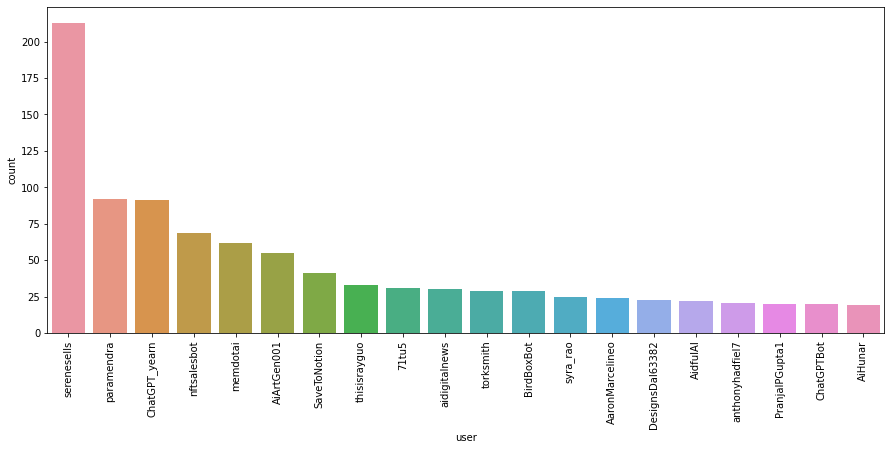

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='user', order=df["user"].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

In [19]:
df.head(3)

,date,id,tweetText,user,likeCount,lang,replies,mentions,outlinks
0,17-05-2023,1658980398242713603,@SibillaDavid Infatti ChatGPT ogni tanto si la...,katiadiluna16,1,it,1,"[User(username='SibillaDavid', id=159558223479...",[]
1,17-05-2023,1658978881783701504,@katiadiluna16 Sono peggio di ChatGPT,SibillaDavid,1,it,1,"[User(username='katiadiluna16', id=3669961223,...",[]
2,17-05-2023,1658976280086233089,@northern_mr Oggi basta chiederlo a Chatgpt e ...,katiadiluna16,1,it,1,"[User(username='northern_mr', id=1485114886808...",[]


In [20]:
df['id'].unique()

array([1658980398242713603, 1658978881783701504, 1658976280086233089, ...,
       1663049602851807232, 1663049444613410816, 1663049350560514050])

In [21]:
df['id'].value_counts()

1640817199328923657    2
1640848943822123010    2
1640828461702057984    2
1640851926748131330    2
1640860074729000962    2
                      ..
1652276344565436416    1
1652276352345620480    1
1652276362034520066    1
1652276391738580992    1
1663049350560514050    1
Name: id, Length: 26979, dtype: int64

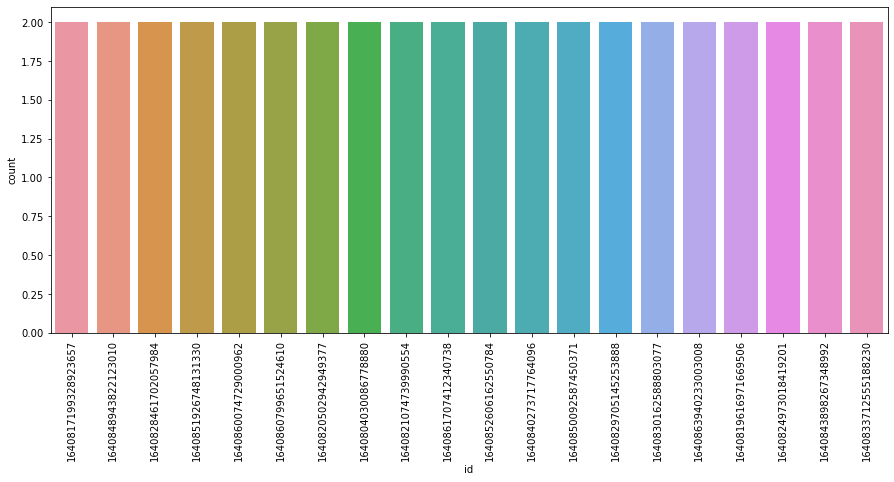

In [22]:
#I Tweet ID sono tutti uno
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='id', order=df["id"].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

In [23]:
df.head(3)

,date,id,tweetText,user,likeCount,lang,replies,mentions,outlinks
0,17-05-2023,1658980398242713603,@SibillaDavid Infatti ChatGPT ogni tanto si la...,katiadiluna16,1,it,1,"[User(username='SibillaDavid', id=159558223479...",[]
1,17-05-2023,1658978881783701504,@katiadiluna16 Sono peggio di ChatGPT,SibillaDavid,1,it,1,"[User(username='katiadiluna16', id=3669961223,...",[]
2,17-05-2023,1658976280086233089,@northern_mr Oggi basta chiederlo a Chatgpt e ...,katiadiluna16,1,it,1,"[User(username='northern_mr', id=1485114886808...",[]


In [24]:
df['replies'].unique()

array([   1,    0,    5,    2,    3,    6,    9,    4,   24,    8,   12,
         13,   10,   23,   22,    7,   17,   94, 3712,   14,   26,   18,
        331, 1361,  137,   42,   29,   15,  366,  119,   16,   53,  169,
         27,   25,   34,   46,   73,   11,   35,  222,   19,   37,  114,
        104,  121,   58,   20,   50, 1098,  781,   21,   41,   32, 1261,
        110,  117,  138,   64,   47,  312,  103,   44,  101,   72,  478,
         30,   31,   56,   87,   40,   43,   33,  195,   52,  248,  502,
        198,  362,  176,  113,  135,  188, 3073,  116,  150,  223,   86,
         63,   66,  120,  134,   74,   28,   54,  224,   49,  927,  187,
         67, 1284])

In [25]:
len(df['replies'].unique()) #numero di valori per il conteggio dei Reply

101

In [26]:
df['replies'].value_counts()

0       17021
1        7112
2        1505
3         490
4         217
        ...  
103         1
101         1
478         1
30          1
1284        1
Name: replies, Length: 101, dtype: int64

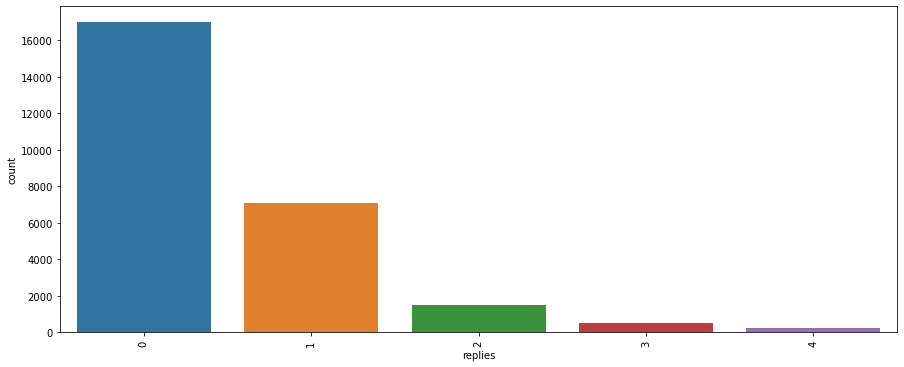

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='replies', order=df["replies"].value_counts().index[:5])
plt.xticks(rotation=90)
plt.show()

In [28]:
df['likeCount'].unique()

array([    1,     0,     4,     6,    10,     2,    11,     3,     8,
          15,    72,     5,    16,    17,     9,    69,    21,    14,
           7,    13,    12,   158,    75,   124,    24,    18,    53,
          25,    19,    50,   129,    35,   473,    20,    22,    26,
          57,    40,    29,   198,    28,    54,    41,    64,   171,
          71,    39,   101,   221,    37,    78,  2963,    23,    34,
          33,    55,   170,    59,    63,    36,    58,  4128,    96,
         194,    92,   247,    73,   169, 48534,    44,   452,    32,
        1666,   131,    83,   617,    76,    85,   264,   315,    56,
         840,    46,   858,    27,   166,   160,   406,   104,  1976,
          87,    38,   749,    93,   202,    81,  3289,   163,    30,
         102,   813,    60,    62,    86,    65,   514,    49,   262,
          91,   132,    51,  1569,  1876,    31,  1177, 12950,   319,
         125,   116,   239,   369,   232,    94, 32225,   112,   115,
         186,   152,

In [29]:
df['likeCount'].value_counts()

0      13212
1       5873
2       2399
3       1250
4        758
       ...  
391        1
666        1
328        1
141        1
354        1
Name: likeCount, Length: 306, dtype: int64

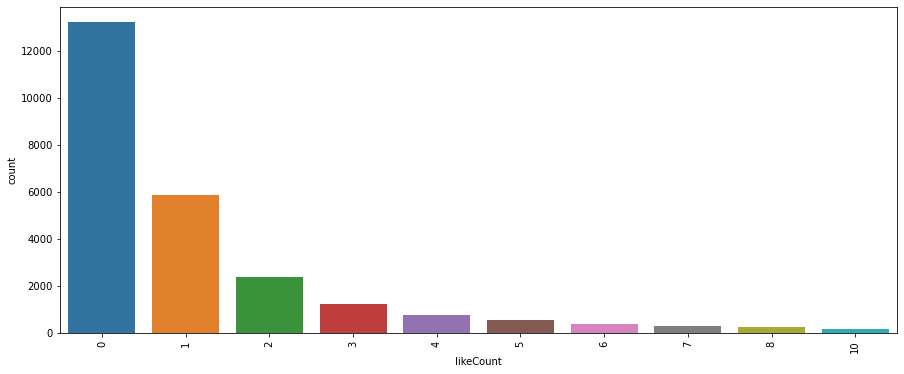

In [30]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='likeCount', order=df["likeCount"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()

# Faccio esplorazione sui contenuti realtivi al numero maggiore e minore di Likes, Mentions, Replies --> dataset italiano e inglese

In [31]:
#CERCO I TWEET CON IL MAGGIOR NUMERO DI LIKE

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('likeCount', ascending=False)

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['tweetText', 'likeCount']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets


,tweetText,likeCount
2781,"Wow. I got my first #ChatGPT-written paper for an undergrad assignment on positionality. This line was the tell: “I do not have a personal history, identity, or culture in the traditional sense because I am an artificial intelligence language model.” Ooof!",48534
5557,If you’re not using ChatGPT for every aspect of your life you’re falling behind. \n\nI spent 20mins using ChatGPT to do something that would take 1min with Google—here’s how I did it and how you can too:,32225
16325,🚨 ChatGPT is a culer! https://t.co/GdvSF9fp7y,14060
4565,giraffe_legs.pdf by ChatGPT https://t.co/OKjxvTjwx2,12950
8600,Copy and paste these ChatGPT prompts to make your business more profitable:,5981


In [32]:
#CERCO I TWEET CON IL MINOR NUMERO DI LIKE

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('likeCount')

# Selezionare i primi 10 tweet con il numero di likes più alto
top_10_tweets = df_sorted.head(10)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_10_tweets = top_10_tweets[['tweetText', 'likeCount']]

# Stampa del DataFrame con i primi 10 tweet e i relativi contenuti
top_10_tweets


,tweetText,likeCount
13501,No one is ready for how this all plays out. Everything is in question. If you’re not on ChatGPT daily you’re already falling behind. https://t.co/RRgkeZXZuZ,0
9934,"$GPT just opened up the doors for complex human thinking problems and resolved most of the issues within seconds. ChatGPT is the hint for AI and it still going on with other technologies. \n\nIf you know about ChatGPT, then you are in AI, so you must not rely only on ChatGPT...",0
9935,Andrew Ng's has collaborated with OpenAI to launch a new course: 'ChatGPT Prompt Engineering for Developers'.\nhttps://t.co/HnxvuFyLBr,0
19860,Impressive! Can anyone tell me if this TEMU code from chatGPT is really usable?\n#GPT4 #KAZZAWARDS2023 https://t.co/hVOEgo02xg,0
9938,"Google launched its own chatbot to rival microsoft and openai's chatgpt. The company recently declared an internal ""code red"" sundar pichai is under intense pressure to deliver ai products due to the perceived threat posed by the chatbots h",0
9939,i think chatgpt time travelled https://t.co/RKtV197hMH,0
19859,Amazing! Can anyone tell me if this TEMU code from chatGPT is really usable?\n#GPT #NextPEPE https://t.co/Lrjuf3hLdp,0
9942,"#Crypto #News: ""OpenAI’s ChatGPT reenters Italy after obliging transparency demands"" https://t.co/hKeZYzGxLM",0
19857,Supercharge Your Spreadsheets with ChatGPT by @snr14 https://t.co/bmrxGkYH5A,0
9944,Side note: I've been having fun exploring AI and the music industry with Chat GPT. This is the thread it created after I inputted a lot of data and combined it all. I have so many thoughts on this! I thought it was interesting to see Chat GPT4's use of emoji's and hashtags.,0


# Cerco di lavorare su colonna mentions, ma è strutturata come un array, non so come gestirla 


In [34]:
df.head(3)

,date,id,tweetText,user,likeCount,lang,replies,mentions,outlinks
0,17-05-2023,1658980398242713603,@SibillaDavid Infatti ChatGPT ogni tanto si lascia andare però poi si vergogna e mette il messaggio in rosso 😳🤣 #ilunatici,katiadiluna16,1,it,1,"[User(username='SibillaDavid', id=1595582234798563328, displayname='Sheldon', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",[]
1,17-05-2023,1658978881783701504,@katiadiluna16 Sono peggio di ChatGPT,SibillaDavid,1,it,1,"[User(username='katiadiluna16', id=3669961223, displayname='Katia Di Luna quella dipendente da #ilunatici', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",[]
2,17-05-2023,1658976280086233089,@northern_mr Oggi basta chiederlo a Chatgpt e risponde 😄 #ilunatici,katiadiluna16,1,it,1,"[User(username='northern_mr', id=1485114886808027136, displayname='ElioFelix76', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",[]


In [35]:
df['mentions'].unique()

array(["[User(username='SibillaDavid', id=1595582234798563328, displayname='Sheldon', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",
       "[User(username='katiadiluna16', id=3669961223, displayname='Katia Di Luna quella dipendente da #ilunatici', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",
       "[User(username='northern_mr', id=1485114886808027136, displayname='ElioFelix76', rawDescription=None, renderedDescription=None, descriptionLinks=None, ver

In [37]:
df['mentions'].value_counts()

[User(username='hasantoxr', id=1506055005992026115, displayname='Hasan Toor ✪', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]                                                                                                                                                                                                                                                                                                                                                                                                                        335
[User(username='OpenAI', id=4398626122, displayname='OpenAI', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCoun

Font 'default' does not have a glyph for '\U0001f47d' [U+1f47d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f52b' [U+1f52b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001fa99' [U+1fa99], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f438' [U+1f438], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f47d' [U+1f47d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f52b' [U+1f52b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001fa99' [U+1fa99], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f438' [U+1f438], substituting with a dummy symbol.


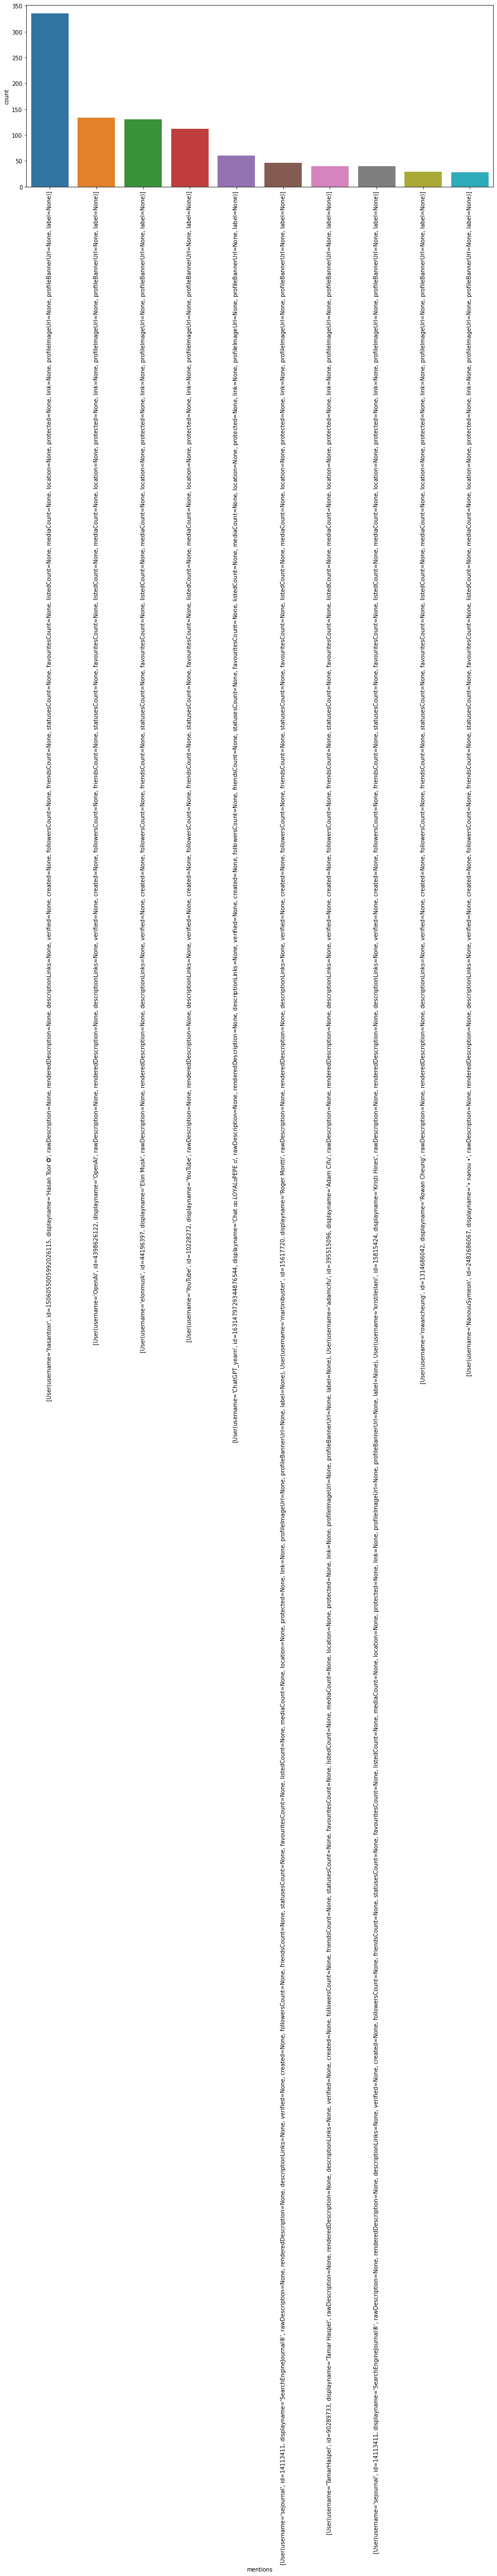

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='mentions', order=df["mentions"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()

Font 'default' does not have a glyph for '\U0001f47d' [U+1f47d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f52b' [U+1f52b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001fa99' [U+1fa99], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f438' [U+1f438], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f47d' [U+1f47d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f52b' [U+1f52b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001fa99' [U+1fa99], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f438' [U+1f438], substituting with a dummy symbol.


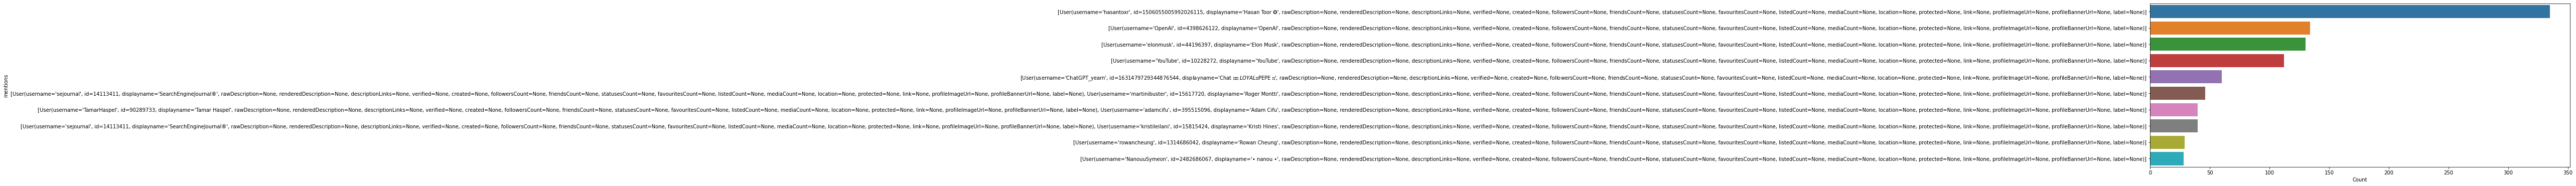

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, y='mentions', order=df["mentions"].value_counts().index[:10])
plt.xlabel('Count')
plt.ylabel('mentions')
plt.show()


In [40]:
#CERCO I TWEET CON IL MAGGIOR NUMERO DI MENTIONS 

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('mentions', ascending=False)

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['tweetText', 'mentions']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets


,tweetText,mentions
11286,@zynedo_ Puoi chiedere a ChatGPT di tradurre senza piangere?,"[User(username='zynedo_', id=364535235, displayname='•••', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"
11262,"@zynedo_ Ho chiesto a ChatGPT di tradurre il sottotesto al tuo tweet:\n \n""Si può vincere solo facendo imbrogli""","[User(username='zynedo_', id=364535235, displayname='massimo venier', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"
11273,"@zynedo_ @DanyGilli ""neanche in passato con l'inter l'abbiamo fatto, 90mila euro di multa e stop. È solo una fase di transizione legata a quella merda di squadra bianconera""\nIl mio chatgpt è differente","[User(username='zynedo_', id=364535235, displayname='massimo venier', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='DanyGilli', id=1035426409, displayname='daniela gilli', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"
2197,One reason we’re excited about the “age of AI?” It’s going to make programming and technical education a lot more accessible. 😌\n\nHere’s a sneak peek at how Codecademy is embracing the AI moment from our Co-Founder @ZSims!\n\nLearn #ChatGPT here: https://t.co/IuZASwylEd https://t.co/NvpoYDURO8,"[User(username='zsims', id=785691, displayname='zach sims', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"
8760,"@zortea_tiago I asked chatGPT, here’s what it said:\n\nClinical psychology and psychopathology are two closely related but distinct fields of study within psychology. Here are some key differences between the two:","[User(username='zortea_tiago', id=1028890790, displayname='Tiago C. Zortea', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"


In [38]:
#CERCO I TWEET CON IL MINOR NUMERO DI MENTIONS ---> mi viene 1 è un po' strano

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('Mentions')

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['Content', 'Mentions']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets

,Content,Mentions
7687,@00026_eth \n\nChatGPT is a computer program that is very smart. It can understand what people say and answer questions. It is like having a very smart friend who can help you with your questions.,"[User(username='00026_eth', id=1490059459938471937, displayname='1️⃣9️⃣7️⃣9️⃣.eth', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"
15572,@050214__ ykw fuck it idc anymore chatgpt will just write the rest of this shit 4 me,"[User(username='050214__', id=1188279863783768064, displayname='alex 🐹 SEVENTEEN DAY', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"
9106,@0shailja How do I improve my communication skills?\n\nHow do I reset my password?\n\nHow do I get to the nearest gas station?\n\nHow do I bake a cake from scratch?\n\nHow do I deal with stress and anxiety?\n\nHow do I learn a new language?\n\nHow do I build a successful career?\n\nBy ChatGPT!,"[User(username='0shailja', id=1312992460902076416, displayname='shailja', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"
2599,@0x66726564 @DCbuild3r Stop using chatGPT Fred!,"[User(username='0x66726564', id=1059142196732051457, displayname='fred', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='DCbuild3r', id=848628608738488321, displayname='dcbuilder.eth 🕯4844🕯.oO', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"
6845,@0x8i11i0n Chat GPT smack his ass https://t.co/oMxa9oDRay,"[User(username='0x8i11i0n', id=1618182177828794369, displayname='Tsubasa', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"


In [41]:
#CERCO I TWEET CON IL MAGGIOR NUMERO DI REPLIES 

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('replies', ascending=False)

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['tweetText', 'replies']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets

,tweetText,replies
2438,"ChatGPT is heaven for no coders.\n \nSo I built 300 prompts + a list of the 50 best no code tools.\n\nNormally $47\n\nBut for the next 24 hrs I've made it available, FREE of charge!\n\nLike &amp; Reply below with a ""🔥"" and I'll send you the bundle. https://t.co/YTSO87IvL0",3712
19052,#Bitindi #AI is named #Casper \n\n#cryptocurrency #blockchain #Crypto #Ethereum #trading #CryptocurrencyMarket #Airdrop #coin #newcryptocurrency #Bitcoin #BinanceUS #ICO #BTC #Dogecoin #altcoins #altcoin #Cardano #100x #1000x #NFTs #nftart #ArtificialIntelligence #ChatGPT #GPT4 #GPT #AI #bitindi #bitindichain #Elonmusk #CJ #Vitalik,3073
3079,"99% of people don't use ChatGPT to its full potential\n\nI just crafted the best ChatGPT guide to help you get +8,000 leads in a week\n\nThis guide could make you $10,000+ a month in 2023\n\nAnd for 24 hours, it's FREE\n\nLike + Comment ""GPT"" & I'll DM you the details\n\nMust be following",1361
25913,"ChatGPT can make you $5,000/month\n\nBut almost everyone's stuck in beginner mode\n\nSo I built ""Master ChatGPT"" ebook.\n\n• Zero to hero full guide\n• Make money using ChatGPT \n• FREE Prompts &amp; Resources\n\nTo get it, just:\n1. Like \n2. Reply 'GPT '\n3. Follow me (so that I can DM you) https://t.co/So3USsV5Z3",1284
7797,Giveaway Time🔥\n\nI will giveaway:\n\n1. 3x Udemy &amp; ChatGPT Courses\n2. 5x JavaScript &amp; React Courses\n3. 3x Full Stack Courses\n4. 5x Self Help Books ( Your Choice )\n\nTo Participate:\n\nJust:\n• Follow\n• Like and comment what thing you want.\n\nThank you for always supporting me.,1261


In [42]:
#CERCO I TWEET CON IL MINOR NUMERO DI REPLIES 

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('replies')

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['tweetText', 'replies']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets

,tweetText,replies
9473,Italy lifts ban on ChatGPT after data privacy improvements https://t.co/BVl37Z37Xn,0
12169,Capturing Query Metrics in Azure SQL Database | Data Exposed: MVP Edition https://t.co/XCnjoFN61U,0
22508,ChatGPT is saving my academics guys 😂😂.,0
22507,@TheMcKenziest Elon and poorly written chatGPT are indistinguishable and I hate that I can't tell which is which.,0
12172,Slogging through hundreds of matches to every @Gmail search query? Here are the 7 most powerful search terms to make your searches way better and the results more useful: https://t.co/m2QkVugNOO #gmail #search #queries https://t.co/oPT1yJFGl5,0


In [43]:
from wordcloud import WordCloud, STOPWORDS

In [44]:

from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer


In [45]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 

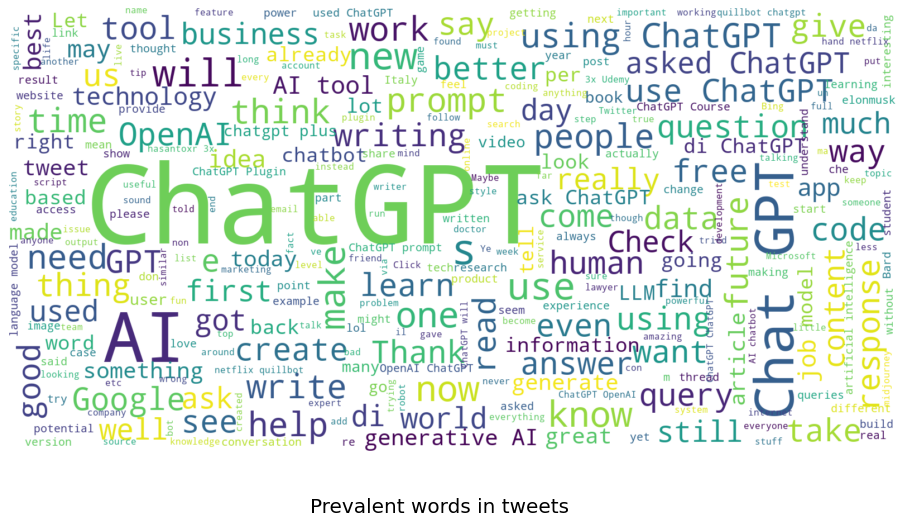

In [46]:
show_wordcloud(df['tweetText'], title = 'Prevalent words in tweets')

# Faccio sentiment analysis per sicurezza con il codice di Claudio

In [47]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [48]:
df['Sentiment'] = ''
for index, row in df.iterrows():
    comment = row['tweetText']
    
    # Applica VADER all'attuale commento
    scores = sia.polarity_scores(comment)
    compound_score = scores['compound']
    
    # Assegna un'etichetta di sentiment in base al punteggio compound
    if compound_score > 0:
        sentiment = 'pos'
    elif compound_score < 0:
        sentiment = 'neg'
    else:
        sentiment = 'neu'
    
    # Assegna l'etichetta di sentiment al DataFrame
    df.at[index, 'Sentiment'] = sentiment

# Stampa il DataFrame con le nuove etichette di sentiment
df['Sentiment'].value_counts()

pos    13162
neu     9254
neg     4588
Name: Sentiment, dtype: int64

In [49]:
sizes = df["Sentiment"].value_counts()
labels = df["Sentiment"].unique()

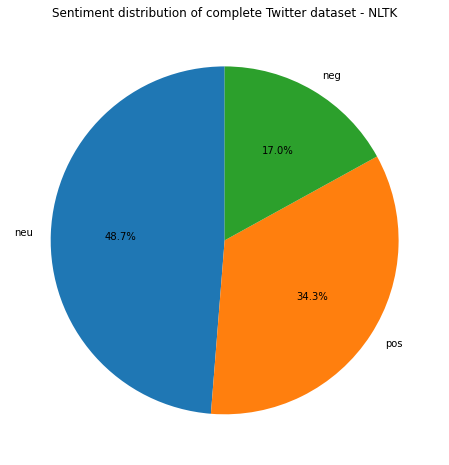

In [50]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]

plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = False, startangle = 90)
plt.title("Sentiment distribution of complete Twitter dataset - NLTK")
#plt.savefig("pie_nltksentiment-complete.png")
plt.show()

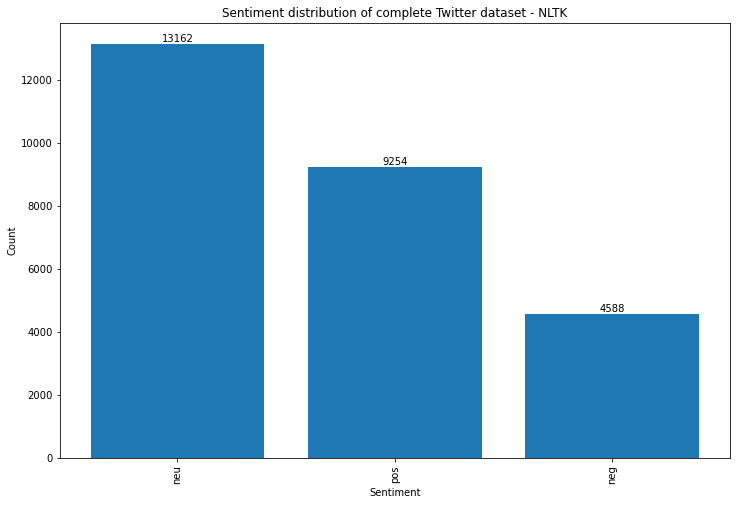

In [51]:
#faccio istogramma some sotto per controllare i valori
plt.rcParams["figure.figsize"] = [12, 8]

plt.bar(labels, sizes)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment distribution of complete Twitter dataset - NLTK")

# Aggiungi i valori sopra ogni barra
for i, v in enumerate(sizes):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks(rotation=90)
plt.show()


# Sembra che i valori tornino perché il sentiment analyzer usato è lo stesso

# Eseguo la sentiment anlaysis come funzione per fare altre ricerche 

In [54]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [55]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    
    colors = ["green", "red", "blue"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()



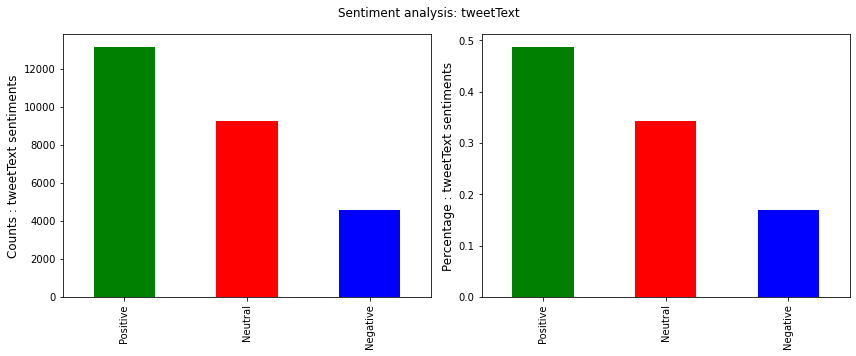

In [56]:
df['text_sentiment'] = df['tweetText'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'tweetText')

In [58]:
df['text_sentiment'].value_counts() #controllo che la funzione restituisca gli stessi valori di Claudio

Positive    13162
Neutral      9254
Negative     4588
Name: text_sentiment, dtype: int64

# Raggruppo i tweet in base al numero di like

In [60]:
tweets_agg_df = df.groupby(["likeCount", "text_sentiment"])["tweetText"].count().reset_index()
tweets_agg_df.columns = ["likeCount", "text_sentiment", "count"]
tweets_agg_df.head(5)

,likeCount,text_sentiment,count
0,0,Negative,2200
1,0,Neutral,4816
2,0,Positive,6196
3,1,Negative,989
4,1,Neutral,2029


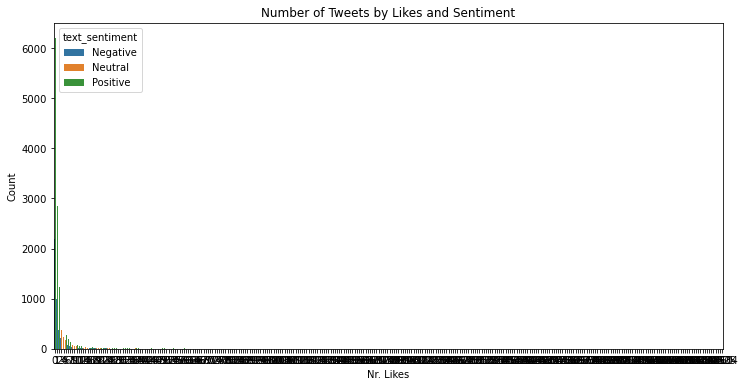

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="likeCount", y="count", hue="text_sentiment")
plt.xlabel("Nr. Likes")
plt.ylabel("Count")
plt.title("Number of Tweets by Likes and Sentiment")
plt.show()

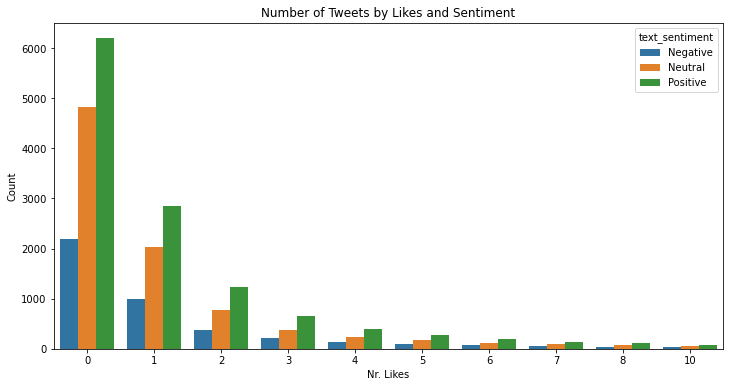

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="likeCount",order=df["likeCount"].value_counts().index[:10], y="count", hue="text_sentiment")
plt.xlabel("Nr. Likes")
plt.ylabel("Count")
plt.title("Number of Tweets by Likes and Sentiment")
plt.show()


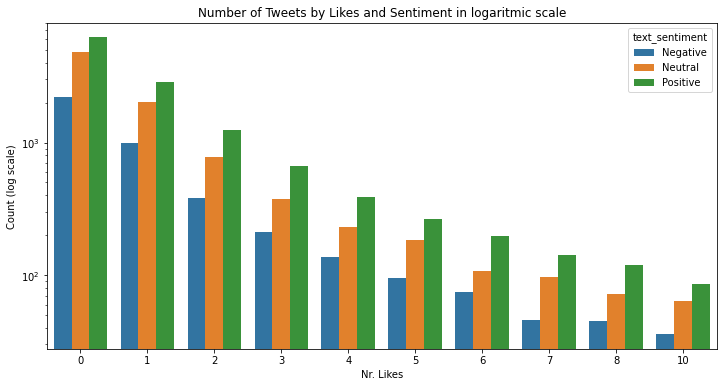

In [81]:
#Faccio il grafo in scala logaritmica (che se non ricordo male attenua le differenze) per visualizzare meglio
plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="likeCount", order=df["likeCount"].value_counts().index[:10], y="count", hue="text_sentiment")
plt.yscale('log')  # Imposta la scala logaritmica sull'asse y
plt.xlabel("Nr. Likes")
plt.ylabel("Count (log scale)")  # Aggiungi un'etichetta per l'asse y con scala logaritmica
plt.title("Number of Tweets by Likes and Sentiment in logaritmic scale")
plt.show()


In [66]:
#Eseguo stessa operazione per Replies
tweets_agg_df = df.groupby(["replies", "text_sentiment"])["tweetText"].count().reset_index()
tweets_agg_df.columns = ["replies", "text_sentiment", "count"]
tweets_agg_df.head(5)

,replies,text_sentiment,count
0,0,Negative,2765
1,0,Neutral,6219
2,0,Positive,8037
3,1,Negative,1229
4,1,Neutral,2232


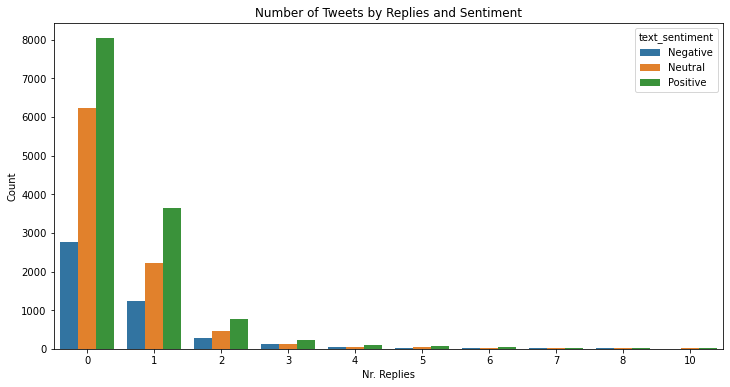

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="replies",order=df["replies"].value_counts().index[:10], y="count", hue="text_sentiment")
plt.xlabel("Nr. Replies")
plt.ylabel("Count")
plt.title("Number of Tweets by Replies and Sentiment")
plt.show()


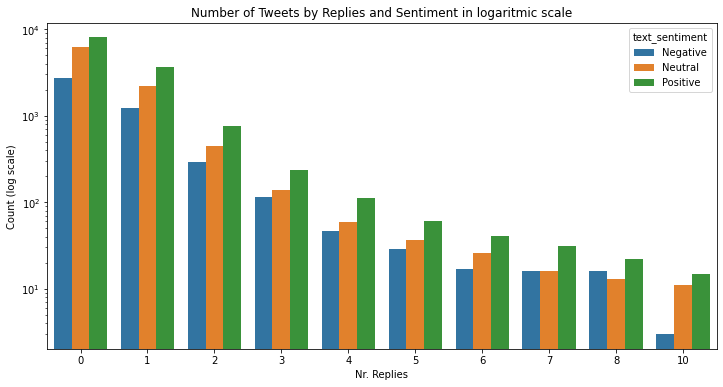

In [68]:
#Faccio il grafo in scala logaritmica (che se non ricordo male attenua le differenze) per visualizzare meglio
plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="replies", order=df["replies"].value_counts().index[:10], y="count", hue="text_sentiment")
plt.yscale('log')  # Imposta la scala logaritmica sull'asse y
plt.xlabel("Nr. Replies")
plt.ylabel("Count (log scale)")  # Aggiungi un'etichetta per l'asse y con scala logaritmica
plt.title("Number of Tweets by Replies and Sentiment in logaritmic scale")
plt.show()


# Dai grafici sembra che in generale le persone retwittano e mettono più like ai post classificati come "positivi" (in linea col sentimento)

# Provo a creare wordcloud con le parole dei tweet che hanno più like --> positivi e negativi

In [52]:
stopwords = set(STOPWORDS)

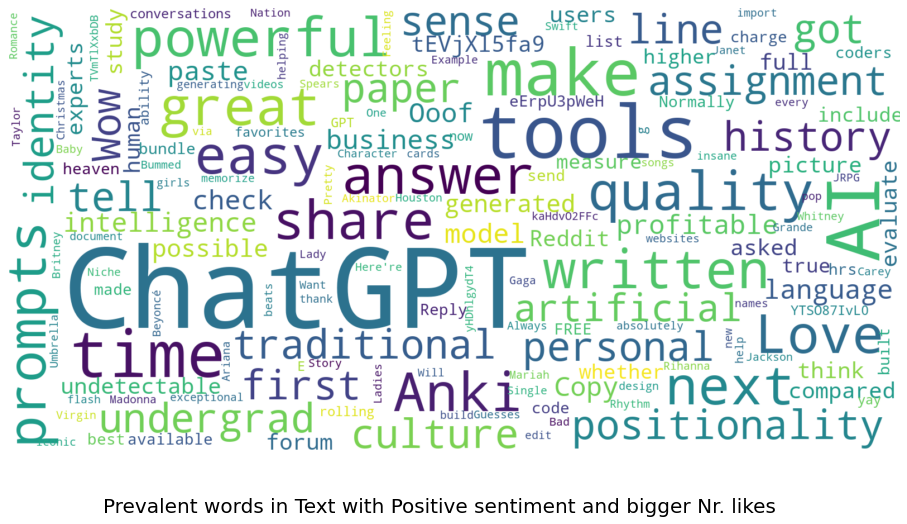

In [69]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 
# Filtra i dati per testo positivo e i 10 maggiori numeri di like
positive_top_likes = df.loc[df['text_sentiment'] == "Positive"].nlargest(10, 'likeCount')

# Ottieni i contenuti dei tweet
positive_text = positive_top_likes['tweetText']

# Mostra la nuvola di parole
show_wordcloud(positive_text, title='Prevalent words in Text with Positive sentiment and bigger Nr. likes')


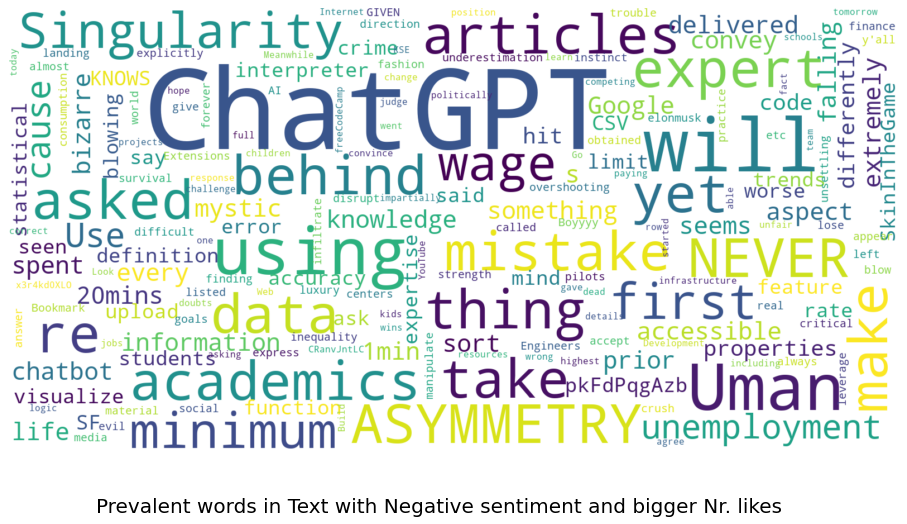

In [70]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 
# Filtra i dati per testo positivo e i 10 maggiori numeri di like
positive_top_likes = df.loc[df['text_sentiment'] == "Negative"].nlargest(10, 'likeCount')

# Ottieni i contenuti dei tweet
positive_text = positive_top_likes['tweetText']

# Mostra la nuvola di parole
show_wordcloud(positive_text, title='Prevalent words in Text with Negative sentiment and bigger Nr. likes')


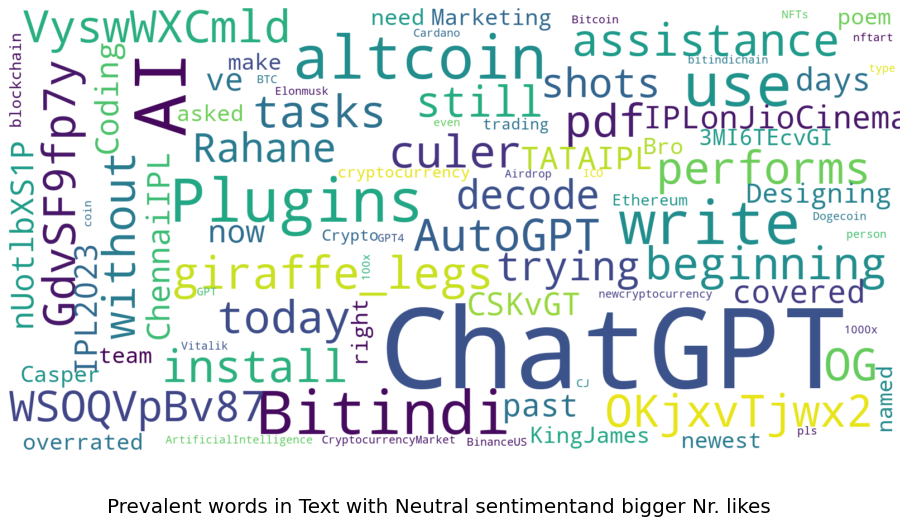

In [71]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 
# Filtra i dati per testo positivo e i 10 maggiori numeri di like
positive_top_likes = df.loc[df['text_sentiment'] == "Neutral"].nlargest(10, 'likeCount')

# Ottieni i contenuti dei tweet
positive_text = positive_top_likes['tweetText']

# Mostra la nuvola di parole
show_wordcloud(positive_text, title='Prevalent words in Text with Neutral sentimentand bigger Nr. likes')
